## Cryptocurrency Clusters

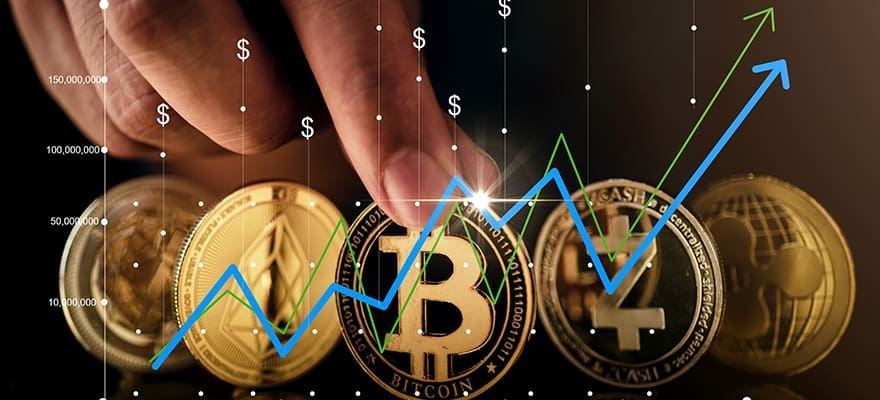

### Data Preparation

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Data/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#df_crypto.dtypes
df_crypto.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df_crypto.drop(df_crypto[df_crypto['IsTrading'] == False].index, inplace=True)
df_crypto = df_crypto.drop(['IsTrading'],axis=1)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
df_crypto['TotalCoinSupply'] = pd.to_numeric(df_crypto['TotalCoinSupply'],errors='coerce')
#df_crypto

In [6]:
df_currency = df_crypto.dropna()
#df_currency

In [7]:
df_cryptocurrency = df_currency.drop(df_currency[df_currency['TotalCoinsMined']<=0].index)
#df_cryptocurrency

In [8]:
df_cryptocurrency=df_cryptocurrency.drop(['CoinName','Unnamed: 0'],axis=1)
#df_cryptocurrency

In [9]:
df_cryptocurrency.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [10]:
df_dummies = pd.get_dummies(df_cryptocurrency)
df_dummies


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dummy variables were created to to convert remaining features `Algorithm` and  `ProofType`, into numerical data. This increased the number of columns in the dataframe to 98. 

- Data Standardization

Sklearn.preprocessing module is used for scaling, centering, and transforming data.

Three methods for sklearn.preprocessing were in consideration: StandardScaler, MinMaxScaler and RobustScaler. For our dataset StandardScaler function was used for standardizing and transforming the data in such a way that the mean of the transformed data is 0 and the Variance is 1.
MinMaxScaler and RobustScaler code is left for demonstration only.


- MinMaxScaler

In [11]:
# >>> from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# scaled_min_max = min_max_scaler.fit_transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
# #scaled_min_max

In [12]:
# df_scaled_minmax = pd.DataFrame(scaled_min_max)
# #df_scaled_minmax

In [13]:
# new_df_minmaxcrypto = pd.DataFrame(df_dummies)
# new_df_minmaxcrypto['TotalCoinsMined'] =df_scaled_minmax[0]
# new_df_minmaxcrypto['TotalCoinSupply'] =df_scaled_minmax[1]

# crypto_final_minmax = new_df_minmaxcrypto#.dropna()
# #crypto_final_minmax.head()

 - RobustScaler

In [14]:
#from sklearn.preprocessing import RobustScaler

In [15]:
#transformer = RobustScaler().fit(df_dummies[['TotalCoinsMined','TotalCoinSupply']])


In [16]:
#tansformed_crypto = transformer.transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
#tansformed_crypto

- StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
scaled_data

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [18]:
df_scaled = pd.DataFrame(scaled_data)
#df_scaled

In [19]:
new_df_cryptocurrency = pd.DataFrame(df_dummies)
new_df_cryptocurrency['TotalCoinsMined'] =df_scaled[0]
new_df_cryptocurrency['TotalCoinSupply'] =df_scaled[1]

crypto_final = new_df_cryptocurrency.dropna()
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-0.115726,-0.151629,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116731,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114622,-0.149767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction

### PCA Model

Creating dummy variables above dramatically increased the number of features in our dataset. We performed dimensionality reduction using PCA Model. To preserve 90% of the explained variance in dimensionality reduction we used PCA(n_components = 0.90).

In our standardized dataset we found NaN inputs. Since PCA is based on SVD or EIG, and these functions do not support NaN inputs, we had to clean our dataset further. As a result of the research, there is no simple, unique way to ignore NaN values when computing these function. There is more option to solve the problem with Nan values - we removed all rows that contained any NaN values (as in a code above). 



In [20]:
# Initialize PCA model
pca = PCA(n_components=0.90)

crypto_pca = pca.fit_transform(crypto_final)
crypto_pca

array([[-0.24151077,  0.61514489,  0.80680123, -0.22857947,  0.04749688],
       [ 2.93662598,  0.6279792 ,  1.03534185, -0.40636504, -0.13798952],
       [-0.22101086,  0.93972894, -0.09684202, -0.21200764,  0.05899655],
       ...,
       [-0.25030116,  0.32949138, -0.33669873,  1.14157068,  0.32574096],
       [25.95390649,  0.11701609,  0.07737958,  0.06633505,  0.09752985],
       [-0.23273797, -0.5124082 , -0.47387553, -0.07985703, -0.10521112]])

In [21]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3", "principal component 4", "principal component 5" ]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.241511,0.615145,0.806801,-0.228579,0.047497
1,2.936626,0.627979,1.035342,-0.406365,-0.137990
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339


When we use for n_components in PCA 0.90 as an input, the number of features changed.
In this case, to get 90% of variance explained we need 5 principal components.

In [22]:
pca.explained_variance_ratio_

array([0.71230101, 0.08172273, 0.05317656, 0.03469429, 0.02515091])

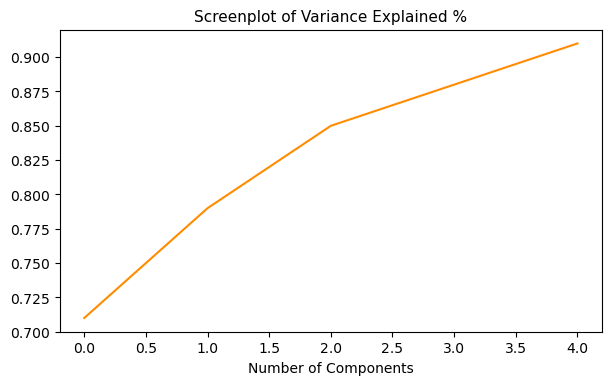

In [23]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(7,4), dpi=100)
plt.plot(variance_exp_cumsum, color='darkorange')
plt.title('Screenplot of Variance Explained %', fontsize=11)
plt.xlabel('Number of Components', fontsize=10)
plt.show()

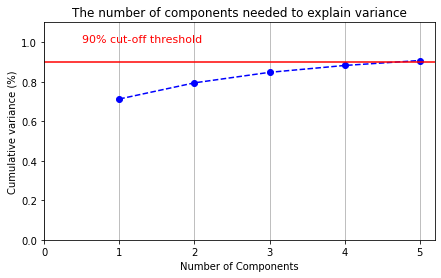

In [24]:
# more ways to visualize the number of components (see resources)
import numpy as np

plt.rcParams["figure.figsize"] = (7,4)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5,1.0, '90% cut-off threshold', color = 'red', fontsize=11)

ax.grid(axis='x')
plt.show()

### t-SNE 

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(learning_rate=90)

In [27]:
# reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [28]:
tsne_features.shape

(205, 2)

The dataset has 2 columns

In [29]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

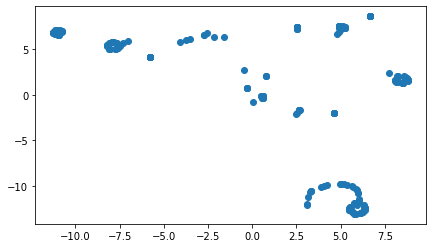

In [30]:
# the clusters visualization
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

Using t-SNE we reduced dataset dimension further. As in scatter plot we can observe some clusters.

### Cluster Analysis with k-Means

To identify the best number of clusters we used Cluster Analysis with K-mean, with elbow plot and clusters visualization.

C:\Users\dasa\.conda\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


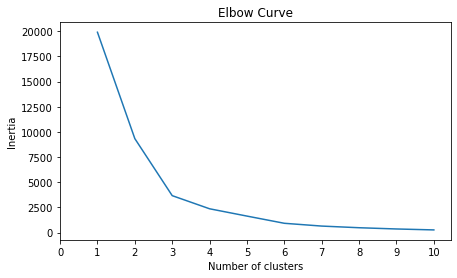

In [31]:
# creating elbow plot to identify  the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
df_elbow

,k,inertia
0,1,19910.017380
1,2,9335.732748
2,3,3667.256675
3,4,2361.815803
4,5,1635.379639
5,6,919.321388
6,7,642.386619
7,8,478.185959
8,9,354.581965
9,10,260.738005


In [33]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(df_crypto_pca)

KMeans(n_clusters=3, random_state=0)

In [34]:
predictions = km.predict(df_crypto_pca)
print(predictions)

[0 2 0 2 2 1 0 2 2 2 0 2 0 0 1 0 2 1 0 0 2 1 2 1 1 0 2 2 1 0 1 0 1 2 0 0 2
 2 1 1 1 1 0 0 1 2 1 1 1 0 0 1 0 2 1 1 1 0 1 2 0 1 0 0 0 1 2 1 0 0 0 0 0 1
 1 1 0 0 2 0 2 0 0 2 2 2 2 0 0 1 0 2 1 0 0 2 0 0 2 2 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 2 0 2 2 1 0 1 2 1 2 1 0 0 2 2 2 2 2 0 1 1 0 2 0 2 0 0 2 2 0 1 2 0
 0 1 0 2 0 0 0 2 2 1 2 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 2
 0 0 2 0 1 0 2 0 1 0 0 0 0 2 0 0 0 0 2 2]


In [35]:
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,x,y
0,-0.241511,0.615145,0.806801,-0.228579,0.047497,8.806330,1.550874
1,2.936626,0.627979,1.035342,-0.406365,-0.137990,-2.166560,6.383732
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997,5.246170,7.376456
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672,-11.168656,6.622353
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339,-8.204003,5.332066


In [36]:
# get_clusters function
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predicition = model.predict(data)
    
    data["class"] = model.labels_
    return data

In [37]:
def show_clusters(df_crypto_pca):
    plt.scatter(x=df_crypto_pca["x"], y=df_crypto_pca['y'], c=df_crypto_pca['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [38]:
clusters = get_clusters(3,df_crypto_pca)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,x,y,class
0,-0.241511,0.615145,0.806801,-0.228579,0.047497,8.806330,1.550874,0
1,2.936626,0.627979,1.035342,-0.406365,-0.137990,-2.166560,6.383732,2
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997,5.246170,7.376456,0
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672,-11.168656,6.622353,2
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339,-8.204003,5.332066,2
...,...,...,...,...,...,...,...,...
200,-0.253363,0.396449,-0.330251,0.998168,0.302115,0.531885,-0.196857,0
201,-0.194521,0.862953,-0.074250,-0.232015,0.021616,5.008749,7.206082,0
202,-0.250301,0.329491,-0.336699,1.141571,0.325741,0.581248,-0.357971,0
203,25.953906,0.117016,0.077380,0.066335,0.097530,-2.570659,6.806806,2


In [39]:
labels = df_crypto_pca['class']

In [40]:
labels.value_counts()

0    99
2    57
1    49
Name: class, dtype: int64

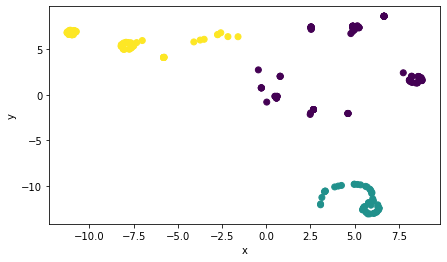

In [41]:
show_clusters(clusters)

### Recommendation

Based on our dataset and the models used we could spilt the cryptocurrencies into some clusters, in our case there will be three clusters.

However we lost some data in the processes to prepare it for modeling (as in the case of PCA Model), and to observe and determine possible cluster more methods and analysis should be performed.    

- Resources


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=k%20mean#sklearn.cluster.KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=t%20sne#sklearn.manifold.TSNE

https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

